# Labeling: Excess Return Over Median

![image_example](img/distribution_over_median.png)
_*Fig. 1:*_ Distribution of excess over median return for 22 stocks from period between Jan 2019 and May 2020.

## Abstract

In this notebook, we demonstrate labeling financial data according to excess over median. Returns are calculated from cross-sectional data on prices of many different stocks. Each observation is labeled according to whether its return exceeds the median return of all stocks in the given time index. The labels can be given numerically as the value of excess over median, or categorically as the sign of the numerical return. The user can also specify a resample period, and optionally lag the returns to make them forward looking.

## Introduction
This technique is used in the following paper:
["The benefits of tree-based models for stock selection"](https://link.springer.com/article/10.1057/jam.2012.17) by _Zhu et al._ (2012). 

In the paper, independent composite features are constructed as weighted averages of various parameters in fundamental and quantitative analysis, such as PE ratio, corporate cash flows, debt etc. The composite features are applied as parameters in linear regression or a decision tree to predict whether a stock will outperform the market median return. The authors use monthly forward returns on stock price data.


## How it works

A dataframe containing stock returns is calculated from prices. The median return of all companies at time $t$ in the dataframe is used to represent the market return, and excess returns are calculated by subtracting the median return from each stock's return over the time period $t$. The numerical returns over median can then be used as-is (for regression analysis), or can be relabeled to represent their signs (for classification analysis).

At time $t$:
    \begin{gather*}
    P_t = \{p_{t,0}, p_{t,1}, \dots, p_{t,n}\} \\
    R_t = \{r_{t,0}, r_{t,1}, \dots, r_{t,n}\} \\
    m_t = median(R_t) \\
    L(R_t) = \{r_{t,0} - m_t, r_{t,1} - m_t, \dots, r_{t,n} - m_t\}
    \end{gather*}

If categorical rather than numerical labels are desired:

$$
     \begin{equation}
     \begin{split}
       L(r_{t,n}) = \begin{cases}
       -1 &\ \text{if} \ \ r_{t,n} - m_t < 0\\
       0 &\ \text{if} \ \ r_{t,n} - m_t = 0\\
       1 &\ \text{if} \ \ r_{t,n} - m_t > 0\\
       \end{cases}
     \end{split}
     \end{equation}
$$

It may be the case that the data is more granular than necessary and the user desires just to find daily or weekly returns. In this case, a resampling period can be inputted, for example 'B' to sample once per business day, and 'W' to sample per week. More details [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects). If a resample period is specified, the returns will be calculated on the only last price in each respective period. The user can lag the returns to make them forward-looking.

---
## Examples of use

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

from mlfinlab.labeling import excess_over_median

import matplotlib.pyplot as plt

In [2]:
# Load price data for 22 stocks
tickers = "AAPL MSFT COST PFE SYY F GE BABA AMD CCL ZM FB WFC JPM NVDA CVX AAL UBER C UA VZ NOK"

data = yf.download(tickers, start="2019-01-20", end="2020-05-25",
                   group_by="ticker")
data = data.loc[:, (slice(None), 'Adj Close')]
data.columns = data.columns.droplevel(1)
data.head()

[*********************100%***********************]  22 of 22 completed


,AMD,MSFT,VZ,C,UBER,AAL,WFC,SYY,JPM,F,...,BABA,FB,ZM,UA,NOK,CCL,PFE,COST,NVDA,CVX
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-22,19.760000,103.568062,54.096535,59.116608,NaN,32.219025,46.484818,60.661575,98.963676,7.837517,...,152.149994,147.570007,NaN,18.590000,5.846427,51.750248,39.946537,209.413116,148.035126,105.162872
2019-01-23,19.799999,104.577469,54.827435,59.384232,NaN,31.146364,46.727222,60.884239,98.713730,7.689988,...,152.029999,144.300003,NaN,18.400000,5.924772,51.512947,39.842587,209.107468,148.552521,104.273567
2019-01-24,20.850000,104.077667,54.172474,59.938599,NaN,33.124386,46.596699,60.535717,98.771400,7.929724,...,155.860001,145.830002,NaN,18.860001,6.032495,52.224846,38.699097,207.352509,157.060287,106.258125
2019-01-25,21.930000,105.028282,53.536488,61.190701,NaN,34.423378,46.736546,60.041988,99.396294,8.169458,...,159.210007,149.009995,NaN,19.490000,6.463387,52.689953,38.406132,206.129929,159.358887,105.986641
2019-01-28,20.180000,102.980049,52.274014,61.028221,NaN,35.988075,46.447533,60.284012,99.867378,7.985046,...,158.919998,147.470001,NaN,19.370001,6.355664,53.534740,37.357147,207.806046,137.328262,105.003731


### Labeling a simple dataframe of prices

We find the excess return over median for all stocks in the dataset.

In [3]:
excess1 = excess_over_median(prices=data, lag=False)
excess1.head()

,AMD,MSFT,VZ,C,UBER,AAL,WFC,SYY,JPM,F,...,BABA,FB,ZM,UA,NOK,CCL,PFE,COST,NVDA,CVX
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-23,0.001406,0.009129,0.012893,0.003909,NaN,-0.033911,0.004597,0.003053,-0.003143,-0.019441,...,-0.001406,-0.022777,NaN,-0.010838,0.012783,-0.005203,-0.003220,-0.002077,0.002877,-0.009074
2019-01-24,0.043061,-0.014748,-0.021915,-0.000634,NaN,0.053538,-0.012762,-0.015693,-0.009385,0.021206,...,0.015223,0.000634,NaN,0.015031,0.008213,0.003851,-0.038669,-0.018362,0.047302,0.009063
2019-01-25,0.034036,-0.008629,-0.029502,0.003127,NaN,0.021453,-0.014761,-0.025918,-0.011436,0.012470,...,0.003731,0.004044,NaN,0.015642,0.053666,-0.008857,-0.025333,-0.023659,-0.003127,-0.020317
2019-01-28,-0.070535,-0.010238,-0.014317,0.006609,NaN,0.054719,0.003080,0.013295,0.014004,-0.013309,...,0.007443,-0.001071,NaN,0.003107,-0.007402,0.025297,-0.018049,0.017396,-0.128981,-0.000010


We can visualize the distribution as a histogram.

Text(0.5, 1.0, 'Distribution of Return Over Median for 22 Stocks')

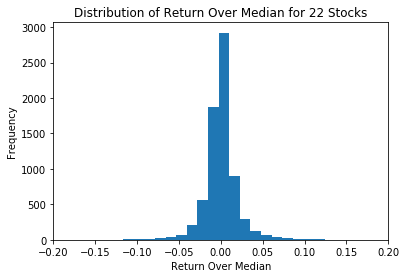

In [4]:
s2 = pd.Series(excess1.values.flatten())
ax2 = s2.plot.hist(bins=50)
ax2.set_xlim(-0.2,0.2)
ax2.set_xlabel('Return Over Median')
ax2.set_title('Distribution of Return Over Median for 22 Stocks')

Instead of returning the numerical value of excess return over median, we can just return the sign. Using categorical rather than numerical labels alleviates problems that can arise due to extreme outlier returns [Zhu et al. 2012].

In [5]:
excess2 = excess_over_median(prices=data, binary=True)
excess2.head()

,AMD,MSFT,VZ,C,UBER,AAL,WFC,SYY,JPM,F,...,BABA,FB,ZM,UA,NOK,CCL,PFE,COST,NVDA,CVX
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-22,1.0,1.0,1.0,1.0,NaN,-1.0,1.0,1.0,-1.0,-1.0,...,-1.0,-1.0,NaN,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0
2019-01-23,1.0,-1.0,-1.0,-1.0,NaN,1.0,-1.0,-1.0,-1.0,1.0,...,1.0,1.0,NaN,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0
2019-01-24,1.0,-1.0,-1.0,1.0,NaN,1.0,-1.0,-1.0,-1.0,1.0,...,1.0,1.0,NaN,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2019-01-25,-1.0,-1.0,-1.0,1.0,NaN,1.0,1.0,1.0,1.0,-1.0,...,1.0,-1.0,NaN,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0
2019-01-28,-1.0,-1.0,-1.0,-1.0,NaN,-1.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,NaN,-1.0,1.0,1.0,1.0,1.0,-1.0,1.0


In [6]:
excess2.stack().value_counts()

-1.0    3629
 1.0    3629
 0.0      19
dtype: int64

### Forward labels with resampling

In the paper, the authors use monthly forward-looking labels. Let's do that here by resampling the data and lagging the returns.

In [7]:
monthly_forward = excess_over_median(prices=data, binary=True, resample_by='M', lag=True)
monthly_forward.head()

,AMD,MSFT,VZ,C,UBER,AAL,WFC,SYY,JPM,F,...,BABA,FB,ZM,UA,NOK,CCL,PFE,COST,NVDA,CVX
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-31,-1.0,1.0,1.0,-1.0,NaN,-1.0,-1.0,1.0,-1.0,-1.0,...,1.0,-1.0,NaN,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0
2019-02-28,1.0,1.0,1.0,-1.0,NaN,-1.0,-1.0,-1.0,-1.0,1.0,...,1.0,1.0,NaN,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0
2019-03-31,1.0,1.0,-1.0,1.0,NaN,1.0,-1.0,1.0,1.0,1.0,...,-1.0,1.0,NaN,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0
2019-04-30,1.0,1.0,1.0,-1.0,NaN,-1.0,-1.0,1.0,-1.0,-1.0,...,-1.0,-1.0,1.0,1.0,1.0,0.0,1.0,1.0,-1.0,1.0
2019-05-31,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0


We can visualize the distribution of the numerical labels.

Text(0.5, 1.0, 'Distribution of Monthly Forward Return Over Median')

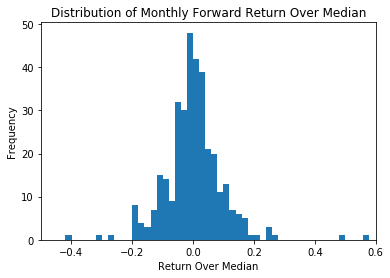

In [8]:
excess3 = excess_over_median(prices=data, binary=False, resample_by='M', lag=True)

s = pd.Series(excess3.values.flatten())
ax = s.plot.hist(bins=50)
ax.set_xlim(-0.5,0.6)
ax.set_xlabel('Return Over Median')
ax.set_title('Distribution of Monthly Forward Return Over Median')

---
## Conclusion

This notebook presents the method to label data according to excess return over median. This method can return either numerical or categorical labels for observations. Zhu et al. utilize these labels to predict monthly stock returns using linear regression and decision trees based on composite features as independent variables. In this process:
 - Returns are obtained from stock prices, and optionally lagged.
 - At each time index, the median rate of return for all stocks is calculated. The median is subtracted from each stock's return to find the excess return over median.
 - If categorical labels are desired, the excess returns are converted to their signs.

This method is useful for labeling data used for training regression and classification models. The user can specify for the data to be labeled on a daily, weekly, monthly etc., basis, and whether the returns are lagged.

## References

1. Zhu, M., Philpotts, D. and Stevenson, M., 2012. The benefits of tree-based models for stock selection. Journal of Asset Management, [online] 13(6), pp.437-448. Available at: <https://link.springer.com/article/10.1057/jam.2012.17>.